In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
file_name = "datasets_31874_41246_Concrete_Data_Yeh.csv"

In [3]:
data = pd.read_csv(file_name)

data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### The correlation matrix

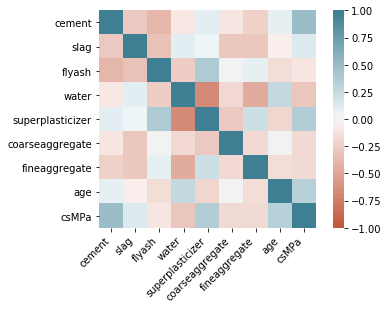

In [5]:
corr = data.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

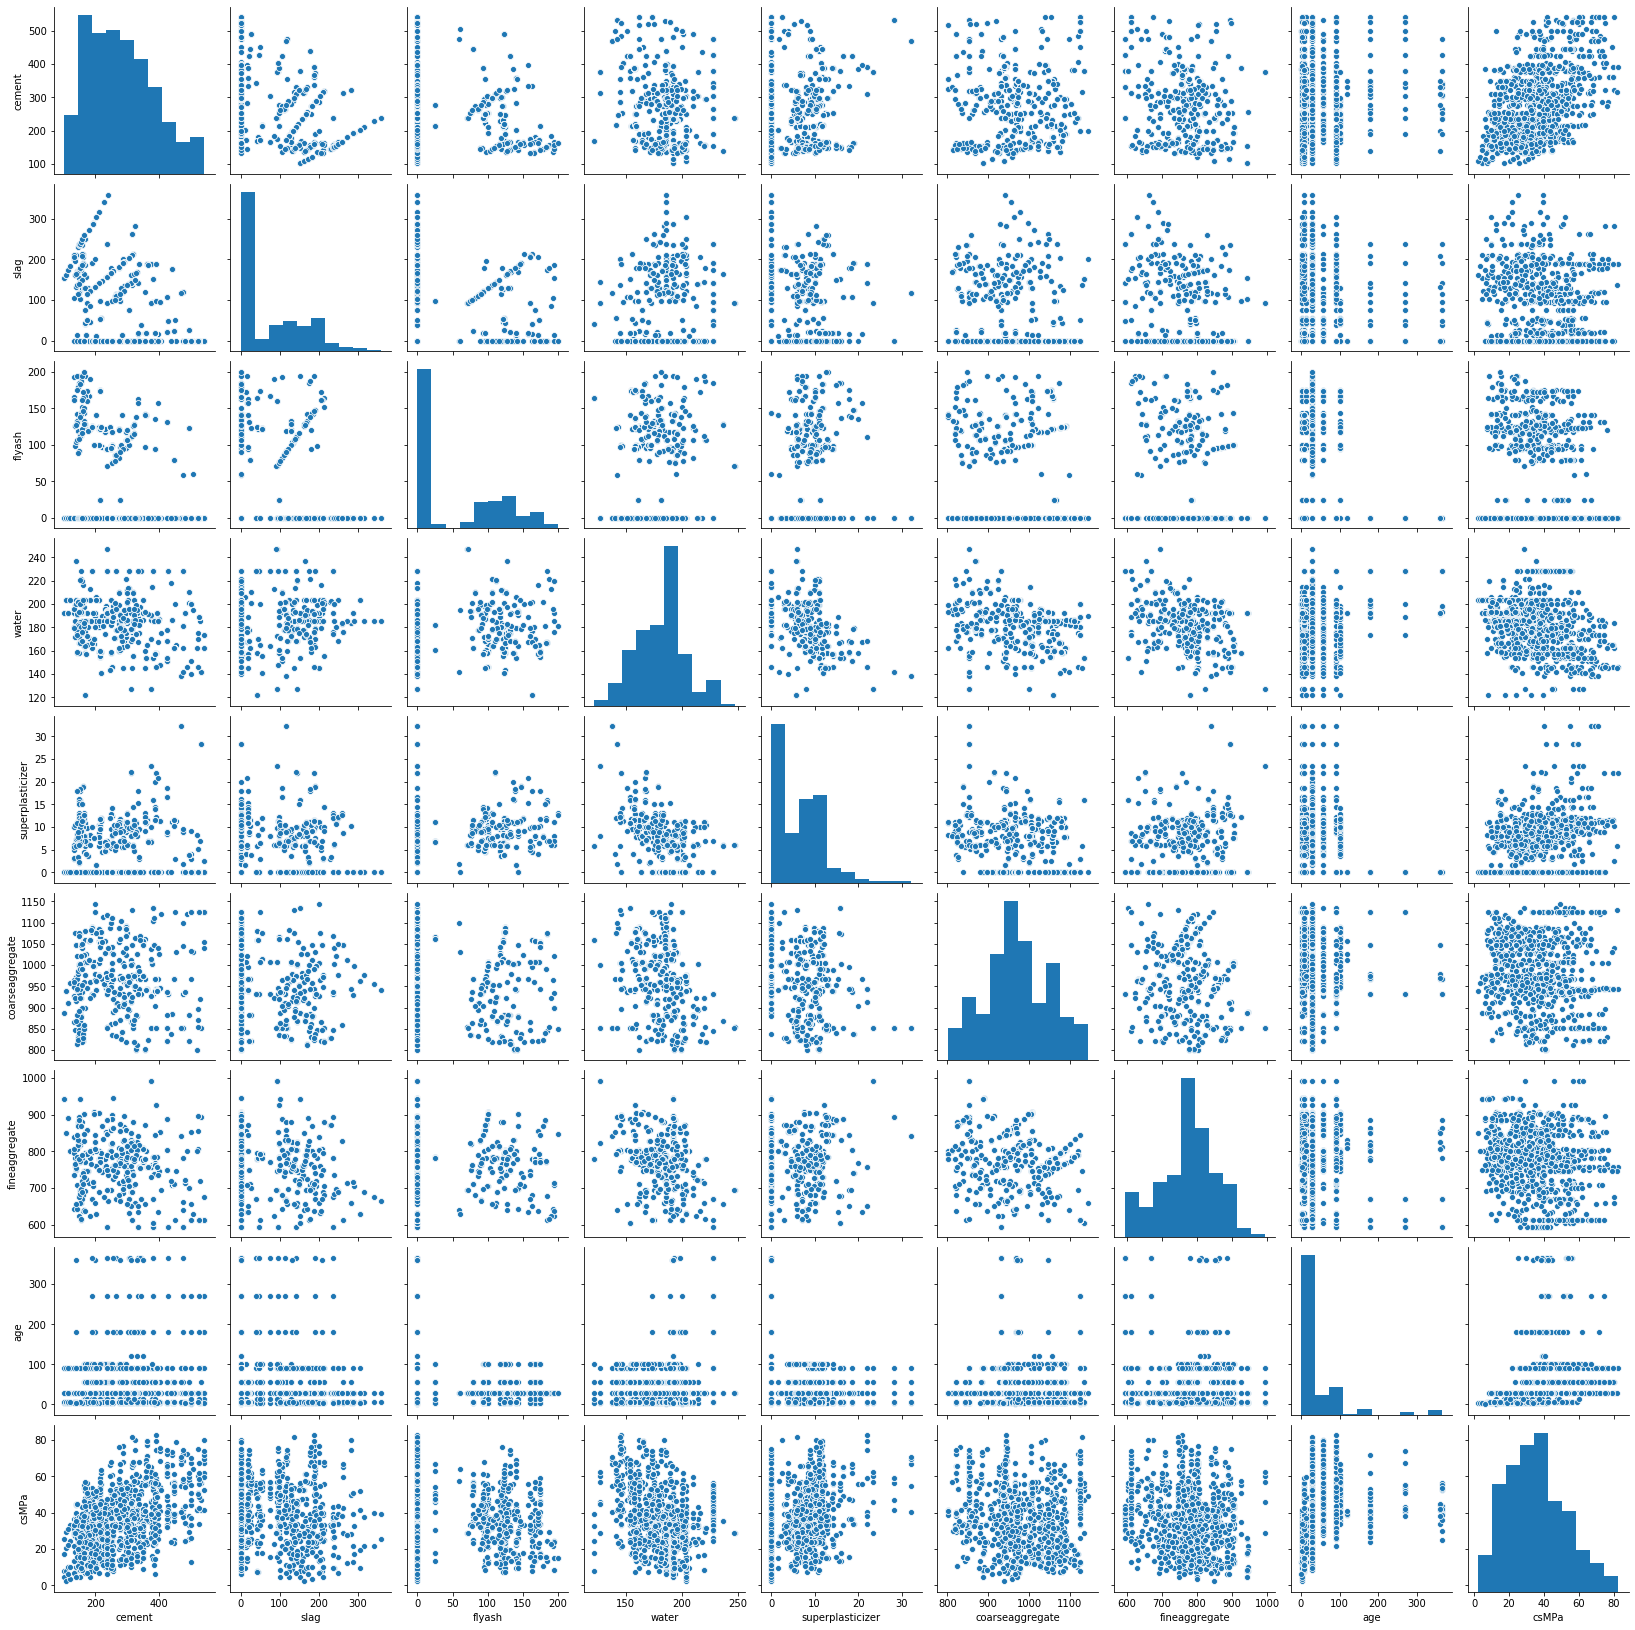

In [6]:
sn.pairplot(data)

In [7]:
sc = StandardScaler()

X = sc.fit_transform(data.drop('csMPa',axis=1).values)
y = data['csMPa'].values

In [8]:
def splitter(chunks):
    return KFold(chunks, shuffle=True)

def test_model(model, chunks):
    for train_index, test_index in splitter(chunks).split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        print('Chunk\'s accuracy score: ', model.score(X_test, y_test))
    print('Accuracy score (on all dataset): ', model.score(X, y))    

In [9]:
def print_feature_importance(model):
    print("\n======== FEATURE IMPORTANCE ========")
    importance = model.coef_
    for i, v in enumerate(importance):
        print('Feature: %s, Score: %.5f' % (data.columns[i], v))

In [10]:
model = LinearRegression()

test_model(model, 5)

print_feature_importance(model)

Chunk's accuracy score:  0.5234351640697756
Chunk's accuracy score:  0.6327944156115299
Chunk's accuracy score:  0.6418993559080359
Chunk's accuracy score:  0.5794908976217586
Chunk's accuracy score:  0.6190148040650348
Accuracy score (on all dataset):  0.615257182521022

======== FEATURE IMPORTANCE ========
Feature: cement, Score: 13.02395
Feature: slag, Score: 9.48403
Feature: flyash, Score: 6.09914
Feature: water, Score: -2.98535
Feature: superplasticizer, Score: 1.57946
Feature: coarseaggregate, Score: 1.65795
Feature: fineaggregate, Score: 2.08317
Feature: age, Score: 7.20698


In [11]:
model = KNeighborsRegressor(n_neighbors = 7)
test_model(model, 5)

Chunk's accuracy score:  0.6877372678048871
Chunk's accuracy score:  0.7169740227187131
Chunk's accuracy score:  0.6297837891650605
Chunk's accuracy score:  0.7140355779492237
Chunk's accuracy score:  0.6935337538716058
Accuracy score (on all dataset):  0.7630282813151488


In [12]:
model = DecisionTreeRegressor()

test_model(model, 5)

Chunk's accuracy score:  0.7913323311653676
Chunk's accuracy score:  0.8410722265653644
Chunk's accuracy score:  0.882825450425197
Chunk's accuracy score:  0.8389734989386658
Chunk's accuracy score:  0.8600116710069127
Accuracy score (on all dataset):  0.9736559262993565


In [13]:
model = RandomForestRegressor()

test_model(model, 5)

Chunk's accuracy score:  0.8823371108380577
Chunk's accuracy score:  0.9195836118384926
Chunk's accuracy score:  0.9024092284198805
Chunk's accuracy score:  0.9225354575202876
Chunk's accuracy score:  0.9374508370252709
Accuracy score (on all dataset):  0.9732993105978421
